<a href="https://colab.research.google.com/github/AmbiTyga/Tweeple-DNA/blob/main/Tweeple_DNA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/Botometer-All ./

# Importing Packages

In [11]:
import pandas as pd 
import numpy as np
import zlib, sys
import pickle as pkl
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
from tqdm import tqdm
import tweepy, time

In [3]:
DNA_CLASS = np.array(["C","T","A"])
# Tweet: A, Retweet: C, Reply: T

def get_dna(x,y=None,id=None):
  '''
  Converts twitter user's timeline to DNA fragement
  '''
  if id is None:
    id = x['user'].values[0]['name']
  else:
    id = x['name'].values[0]
  

  x = x[['in_reply_to_status_id','retweeted']].copy()
  x['reply'] = x['in_reply_to_status_id'].notnull()

  x.drop(columns=['in_reply_to_status_id'],inplace=True)

  x['tweet'] = ~(x['retweeted'] | x['reply'])
  x = x.astype(int)

  dna = ''.join(DNA_CLASS[x.values.argmax(axis = 1)]).encode('ascii')
  
  
  compressed_dna = zlib.compress(dna)
  
  return {'name':id,
          'DNA':dna,
          'size':sys.getsizeof(dna),
          'compressed_size':sys.getsizeof(compressed_dna),
          'compression_ratio':sys.getsizeof(dna)/sys.getsizeof(compressed_dna),
          'type':y}

# Authorize Tweepy

In [4]:
# assign the values accordingly 
consumer_key = 'WQXzjRaf3Ql66dcv4hls1ULkS'	
consumer_secret = 'QQG7PPvchLRul5dhAMLi7KWp59U56Hh1399zpBSfGQ7ZTKR8m1'	
access_token= '983655149049528321-LJacg24BNwe19VE51mKhFJ8IPwpiVia'		
access_token_secret = 'cx3hRsOdeRK8FuBnbLXT6suTREvyzdmfAM2PFWAsBw5vZ'
  
# authorization of consumer key and consumer secret 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
# set access to user's access key and access secret  
auth.set_access_token(access_token, access_token_secret) 
  
# calling the api  
api = tweepy.API(auth) 

# Astroturf

In [ ]:
!7z x /content/Botometer-All/Astroturf.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 15873989 bytes (16 MiB)

Extracting archive: /content/Botometer-All/Astroturf.7z
--
Path = /content/Botometer-All/Astroturf.7z
Type = 7z
Physical Size = 15873989
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

  0%     12% - bot-218#1.pkl                     26% - bot-218#1.pkl                     40% - bot-218#1.pkl                     55% - bot-218#1.pkl                     71% - bot-218#1.pkl                    

In [ ]:
with open("/content/bot-218#1.pkl",'rb') as f:
  bot = pkl.load(f)

In [ ]:
bot = [x for _,x in bot]
bot = [get_dna(x,'AstroTurf') for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Astro218.json')

# Botometer-feedback

In [ ]:
!7z X /content/drive/MyDrive/Botometer-All/Boto-Feedback.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Botometer-All/                                               1 file, 25129647 bytes (24 MiB)

Extracting archive: /content/drive/MyDrive/Botometer-All/Boto-Feedback.7z
--
Path = /content/drive/MyDrive/Botometer-All/Boto-Feedback.7z
Type = 7z
Physical Size = 25129647
Headers Size = 234
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      8% 1 - Boto-Feedback/bot-95.pkl                                  16% 1 - Boto-Feedback/bot-95.pkl                                  24% 2 - Boto-Feedback/human-312.pkl

## BOTS

In [ ]:
with open("/content/Boto-Feedback/bot-95.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Boto-Feedback') for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/botoFF-bot94.json')

## Humans

In [ ]:
with open("/content/Boto-Feedback/human-312.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Boto-Feedback') for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/botoFF-human311.json')

# CRTBust

In [ ]:
!7z x /content/Botometer-All/CRTbust.7z

## humans

In [ ]:
with open("/content/CRTbust/human-308.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'CRT-bust') for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/CRT-human308.json')

## bots


In [ ]:
del data
with open("/content/CRTbust/bot-310.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'CRT-bust') for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/CRT-bot310.json')

# CELEBRITY

In [ ]:
!7z x /content/Botometer-All/Celebrity.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 562648610 bytes (537 MiB)

Extracting archive: /content/Botometer-All/Celebrity.7z
--
Path = /content/Botometer-All/Celebrity.7z
Type = 7z
Physical Size = 562648610
Headers Size = 301
Method = LZMA2:24
Solid = +
Blocks = 2

  0%      0% 2 - Celebrity/human-1500#2.pkl                                     1% 2 - Celebrity/human-1500#2.pkl                                     2% 2 - Celebrity/human-1500#2.pkl                                   

## Humans - 1

In [ ]:
del data, human
with open("/content/Celebrity/human-1500.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict(),t] for u,t in tweets.groupby('user_id')]

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Celebrity') for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Celebrity-human1454.json')

## Humans - 2

In [ ]:
del data, human
with open("/content/Celebrity/human-1500#2.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict(),t] for u,t in tweets.groupby('user_id')]

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Celebrity') for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Celebrity-human1431.json')

## Humans - 3

In [ ]:
del data, human
with open("/content/Celebrity/human-1500#3.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
del tweets,users
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict(),t] for u,t in tweets.groupby('user_id')]

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Celebrity') for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Celebrity-human1409.json')

## Humans - 4

In [ ]:
del data, human
with open("/content/Celebrity/human-1500#4.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
del tweets,users
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict(),t] for u,t in tweets.groupby('user_id')]

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Celebrity') for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Celebrity-human1432.json')

# Cresci17

In [ ]:
!7z x /content/Botometer-All/Cresci17.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 491226047 bytes (469 MiB)

Extracting archive: /content/Botometer-All/Cresci17.7z
--
Path = /content/Botometer-All/Cresci17.7z
Type = 7z
Physical Size = 491226047
Headers Size = 536
Method = LZMA2:24
Solid = +
Blocks = 3

  0%      0% 8 - Cresci17/Crowdflower/bot-1464#1.pkl                                              1% 8 - Cresci17/Crowdflower/bot-1464#1.pkl                                              2% 8 - Cresci17/Crowdflower/bot-1464#

## Bot 718

In [ ]:
del data
with open("/content/Cresci17/Crowdflower/bot-1464#1.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
del tweets,users
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict(),t] for u,t in tweets.groupby('user_id')]

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Cresci17') for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Cresci-Crowdflower-bot718.json')

## Bot 1093

In [ ]:
del data, bot
with open("/content/Cresci17/Crowdflower/bot-1464#2.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
del tweets,users
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict(),t] for u,t in tweets.groupby('user_id')]

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Cresci17') for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Cresci-CF-bot1093.json')

## Humans

In [ ]:
del data, tweets, users
with open("/content/Cresci17/Crowdflower/human-1500.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict('records')[0],t] for u,t in tweets.groupby('user_id')]

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Cresci17') for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Cresci-CF-human-1095.json')

## Fake Followers

In [ ]:
del data, tweets, users, human
with open("/content/Cresci17/Fake_ff/fake_followers-3351.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
bot = []
for x, y in data:
  y['name'] = list(x['name'].values())[0]
  bot.append(y.fillna(False))

In [ ]:
bot = [get_dna(x,'Cresci17') for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json("/content/drive/MyDrive/DNA/Cresci-FakeFF-3202.json")

## SpamBot 4912

In [ ]:
del data, bot
with open("/content/Cresci17/Social_spambots/spambots-4912.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
bot = []
for x, y in data:
  y['name'] = list(x['name'].values())[0]
  bot.append(y.fillna(False))

In [ ]:
bot = [get_dna(x,'Cresci17') for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Cresci-SPM-4912.json')

## Traditional Bot -1k

In [ ]:
del data, bot, x,y
with open("/content/Cresci17/Traditional/TS-1000.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
bot = []
for x, y in data:
  y['name'] = list(x['name'].values())[0]
  bot.append(y.fillna(False))

In [ ]:
bot = [get_dna(x,'Cresci17') for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json("/content/drive/MyDrive/DNA/Cresci-TS-1k.json")

## Traditional Bot -739

In [ ]:
del data, bot, x,y
with open("/content/Cresci17/Traditional/TS-739.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
del tweets,users,ts

tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict(),t] for u,t in tweets.groupby('user_id')]

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Cresci17',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json("/content/drive/MyDrive/DNA/Cresci-TS-681.json")

## Genuine Accounts

In [ ]:
del data, bot, tweets, users
with open("/content/Cresci17/Genuine_ACC/genuine_ACC-3474.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
human = []
for x, y in data:
  y['name'] = list(x['name'].values())[0]
  human.append(y.fillna(False))

human = [get_dna(x,'Cresci17') for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Cresci-Genuine-1083.json')

# Gilani

In [ ]:
!7z x /content/Botometer-All/Gilani.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 138900023 bytes (133 MiB)

Extracting archive: /content/Botometer-All/Gilani.7z
--
Path = /content/Botometer-All/Gilani.7z
Type = 7z
Physical Size = 138900023
Headers Size = 284
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      1% 1 - Gilani/bot-328.pkl                             2% 1 - Gilani/bot-328.pkl                             4% 1 - Gilani/bot-328.pkl                             5% 1 - Gilani/bot-328.pkl                 

## Bot 328

In [ ]:
del data,human
with open("/content/Gilani/bot-328.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Gilani',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Gilani-Bot-326.json')

## Bot 654

In [ ]:
del data, bot
with open("/content/Gilani/bot-654.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Gilani',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Gilani-Bot-654.json')

## human 56

In [ ]:
del data, bot
with open("/content/Gilani/human-56.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Gilani',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Gilani-human-56.json')

## human 753

In [ ]:
del data, human
with open("/content/Gilani/human-753.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Gilani',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Gilani-human-753.json')

# Midterm

In [ ]:
!7z x /content/drive/MyDrive/Botometer-All/Midterm.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Botometer-All/                                               1 file, 539230026 bytes (515 MiB)

Extracting archive: /content/drive/MyDrive/Botometer-All/Midterm.7z
--
Path = /content/drive/MyDrive/Botometer-All/Midterm.7z
Type = 7z
Physical Size = 539230026
Headers Size = 344
Method = LZMA2:24
Solid = +
Blocks = 4

  0%      0% 1 - Midterm-18/Midhuman-1115.pkl                                       1% 1 - Midterm-18/Midhuman-1115.pkl                                       2% 1 - Midt

## Midhuman 1115

In [ ]:
del data, human
with open('/content/Midterm-18/Midhuman-1115.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Midterm',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Midterm-human-1115.json')

## Midhuman 1192

In [ ]:
del data, human
with open('/content/Midterm-18/Midhuman-1192.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Midterm',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Midterm-human-1192.json')

## Midhuman 1195

In [ ]:
del data, human
with open('/content/Midterm-18/Midhuman-1195.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Midterm',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Midterm-human-1195.json')

## Midhuman 1202

In [ ]:
del data,human
with open('/content/Midterm-18/Midhuman-1202.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Midterm',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Midterm-human-1202.json')

## Midhuman 1203

In [ ]:
del data,human
with open('/content/Midterm-18/Midhuman-1203.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Midterm',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Midterm-human-1203.json')

## Midhuman 1300

In [ ]:
# del data,human
with open('/content/Midterm-18/Midhuman-1300.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Midterm',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Midterm-human-1300.json')

## MidBOT 43

In [ ]:
del data, human
with open("/content/Midbot-43.pkl",'rb') as f:
  data = pkl.load(f)

In [ ]:
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict('records')[0],t] for u,t in tweets.groupby('user_id')]

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Midterm',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Midterm-bot-43.json')

# Pronbot

In [ ]:
!7z x /content/Botometer-All/Pronbots.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 77681587 bytes (75 MiB)

Extracting archive: /content/Botometer-All/Pronbots.7z
--
Path = /content/Botometer-All/Pronbots.7z
Type = 7z
Physical Size = 77681587
Headers Size = 363
Method = LZMA2:24
Solid = +
Blocks = 2

  0%      2% 1 - Pronbots/bot-2000#1.pkl                                  5% 1 - Pronbots/bot-2000#1.pkl                                  8% 2 - Pronbots/bot-2000#2.pkl                                 10% 2 - P

In [ ]:
del data
data = []
filenames = glob("/content/Pronbots/bot*")
for filename in filenames:
  print(filename)
  with open(filename,'rb') as f:
    data += pkl.load(f)

/content/Pronbots/bot-2000#2.pkl
/content/Pronbots/bot-2000#1.pkl
/content/Pronbots/bot-2000#9.pkl
/content/Pronbots/bot-2000#8.pkl
/content/Pronbots/bot-2000#3.pkl
/content/Pronbots/bot-2000#5.pkl
/content/Pronbots/bot-2000#7.pkl
/content/Pronbots/bot-2000#6.pkl
/content/Pronbots/bot-2000#4.pkl
/content/Pronbots/bot-2000#10.pkl


In [ ]:
len(data)

1910

In [ ]:
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

pronbot = [[users[users['id']==int(u)].to_dict('records')[0],t] for u,t in tweets.groupby('user_id')]

In [ ]:
pronbot = [x for _,x in pronbot]
pronbot = [get_dna(x,'Pronbot',True) for x in pronbot]
pronbot = pd.DataFrame(pronbot)
pronbot['compression_ratio'] = pronbot['size']/pronbot['compressed_size']
pronbot['target'] = 'bot'

In [ ]:
pronbot.to_json('/content/drive/MyDrive/DNA/Pronbot-1910.json')

# Stocks

In [ ]:
!7z x /content/Botometer-All/Stock.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 789066571 bytes (753 MiB)

Extracting archive: /content/Botometer-All/Stock.7z
--
Path = /content/Botometer-All/Stock.7z
Type = 7z
Physical Size = 789066571
Headers Size = 453
Method = LZMA2:24
Solid = +
Blocks = 6

  0%      0% 2 - Stock/bot-1269#6.pkl                               1% 2 - Stock/bot-1269#6.pkl                               2% 2 - Stock/bot-1269#6.pkl                               3% 2 - Stock/bot-1269#6.pkl

## Bot 1269

In [ ]:
del data, pronbot
with open('/content/Stock/bot-1269#6.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Stocks',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Stock-bot-1268.json')

## Bot 1738

In [ ]:
del data, bot
with open('/content/Stock/bot-1738#8.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Stocks',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Stock-bot-1738.json')

## Bot 1985

In [ ]:
del data, bot
with open('/content/Stock/bot-1985#7.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Stocks',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Stock-bot-1985.json')

## Bot 453

In [ ]:
del data, bot
with open('/content/Stock/bot-453#3.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Stocks',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Stock-bot-453.json')

## Bot 598

In [ ]:
del data, bot
with open('/content/Stock/bot-598#4.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Stocks',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Stock-bot-598.json')

## Bot 638

In [ ]:
del data, bot
with open('/content/Stock/bot-638#1.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Stocks',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Stock-bot-637.json')

## Human 1345

In [ ]:
# del data, bot
with open('/content/Stock/human-1345#3.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Stocks',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Stock-human-1345.json')

## Human 1437

In [ ]:
del data, human
with open('/content/Stock/human-1437#4.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Stocks',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Stock-human-1437.json')

## Human 1451

In [ ]:
del data, human
with open('/content/Stock/human-1451#1.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Stocks',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Stock-human-1451.json')

## Human 1471

In [ ]:
del data, human
with open('/content/Stock/human-1471#2.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Stocks',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Stock-human-1471.json')

# Varol

In [ ]:
!7z x /content/Botometer-All/Varol.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 178412016 bytes (171 MiB)

Extracting archive: /content/Botometer-All/Varol.7z
--
Path = /content/Botometer-All/Varol.7z
Type = 7z
Physical Size = 178412016
Headers Size = 226
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 1 - Varol/bot-826.pkl                            1% 1 - Varol/bot-826.pkl                            2% 1 - Varol/bot-826.pkl                            3% 1 - Varol/bot-826.pkl                          

## Bot 647

In [ ]:
del data, tweets, users, human
with open('/content/Varol/bot-826.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict('records')[0],t] for u,t in tweets.groupby('user_id')]

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Varol',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Varol-bot-647.json')

## human 1747

In [ ]:
del data
with open('/content/Varol/human-1747.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
del tweets, users
tweets = pd.concat([pd.DataFrame([x._json for x in y]) for y in data],ignore_index = True)

users = pd.DataFrame(tweets['user'].tolist())
users.drop_duplicates('id',inplace=True)

tweets['user_id'] = tweets['user'].apply(lambda x:x['id'])

data = [[users[users['id']==int(u)].to_dict('records')[0],t] for u,t in tweets.groupby('user_id')]

In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Varol',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Varol-human-1285.json')

# Vendor

In [ ]:
!7z x /content/Botometer-All/Vendor.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 27434739 bytes (27 MiB)

Extracting archive: /content/Botometer-All/Vendor.7z
--
Path = /content/Botometer-All/Vendor.7z
Type = 7z
Physical Size = 27434739
Headers Size = 182
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      6% 1 - Vendor/bot-708.pkl                            13% 1 - Vendor/bot-708.pkl                            20% 1 - Vendor/bot-708.pkl                            27% 1 - Vendor/bot-708.pkl                    

In [ ]:
del data, human
with open('/content/Vendor/bot-708.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'Vendor',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Vendor-bot-707.json')

# Verified

In [ ]:
!7z x /content/Botometer-All/Verified.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 146133589 bytes (140 MiB)

Extracting archive: /content/Botometer-All/Verified.7z
--
Path = /content/Botometer-All/Verified.7z
Type = 7z
Physical Size = 146133589
Headers Size = 239
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      1% 1 - Verified/verifiedhuman-199.pkl                                         2% 1 - Verified/verifiedhuman-199.pkl                                         4% 1 - Verified/verifiedhuman-199.pkl 

In [ ]:
data = []
filenames = glob("/content/Verified/*")
for filename in filenames:
  print(filename)
  with open(filename,'rb') as f:
    data += pkl.load(f)

/content/Verified/verifiedhuman-199.pkl
/content/Verified/verifiedhuman-886.pkl
/content/Verified/verifiedhuman-887.pkl


In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Verified',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Verified-human-1972.json')

# Botwiki

In [ ]:
!7z x /content/Botometer-All/botwiki.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/Botometer-All/                                 1 file, 20407931 bytes (20 MiB)

Extracting archive: /content/Botometer-All/botwiki.7z
--
Path = /content/Botometer-All/botwiki.7z
Type = 7z
Physical Size = 20407931
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      8% - bot-643#1.pkl                     17% - bot-643#1.pkl                     27% - bot-643#1.pkl                     36% - bot-643#1.pkl                     45% - bot-643#1.pkl                    

In [ ]:
del data, human
with open('/content/bot-643#1.pkl','rb') as f:
  data = pkl.load(f)

In [ ]:
bot = [x for _,x in data]
bot = [get_dna(x,'botwiki',True) for x in bot]
bot = pd.DataFrame(bot)
bot['compression_ratio'] = bot['size']/bot['compressed_size']
bot['target'] = 'bot'

In [ ]:
bot.to_json('/content/drive/MyDrive/DNA/Botwiki-643.json')

# Caverlee

In [ ]:
!7z x /content/Botometer-All/Caverlee.7z

In [ ]:
data = []
filenames = glob("/content/Caverlee/legimate*")
for filename in filenames:
  print(filename)
  with open(filename,'rb') as f:
    data += pkl.load(f)

/content/Caverlee/legimate-2129.pkl
/content/Caverlee/legimate-2198.pkl
/content/Caverlee/legimate-1946.pkl
/content/Caverlee/legimate-1993.pkl
/content/Caverlee/legimate-2434.pkl
/content/Caverlee/legimate-1957.pkl


In [ ]:
human = [x for _,x in data]
human = [get_dna(x,'Caverlee',True) for x in human]
human = pd.DataFrame(human)
human['compression_ratio'] = human['size']/human['compressed_size']
human['target'] = 'human'

In [ ]:
human.to_json('/content/drive/MyDrive/DNA/Caverlee-12593-human.json')

# All

In [5]:
data = []
for x in glob('/content/drive/MyDrive/DNA/*.json'):
  data.append(pd.read_json(x))
data = pd.concat(data,ignore_index=True)
data = data.sample(frac = 1).reset_index(drop=True)

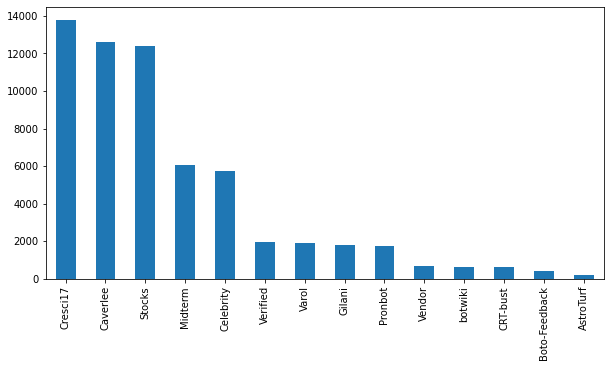

In [60]:
plt.figure(figsize=(10,5))
data['type'].value_counts().plot.bar()
plt.show()

In [71]:
data['target'] = data['target'].replace(['human','bot'],[int(0),int(1)])

In [ ]:
data.head()

,name,DNA,size,compressed_size,type,compression_ratio,target
3954,Hidayet Türkoğlu,AATATATAATAAAAAAATAAAAAAATAAAAAAAAAAAAAATAAAAA...,233,89,Celebrity,2.617978,0
18150,J\xfalia C.,TTTT,37,45,Cresci17,0.822222,1
31852,.,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,169,45,Stocks,3.755556,1
18571,Augusto N.,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,3233,60,Cresci17,53.883333,1
13180,Monica Carta,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,1760,55,Cresci17,32.000000,1


# Classifiers

In [62]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, mean_squared_error

In [ ]:
train,test = train_test_split(data,
                              test_size=0.3,
                              random_state = 2021,
                              stratify=data['type'])

In [65]:
data.head()

,name,DNA,size,compressed_size,type,compression_ratio,target
0,Fehmi Koru,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,233,45,Celebrity,5.177778,human
1,Drew Bundy,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,155,45,Stocks,3.444444,bot
2,Wilson,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,167,45,Caverlee,3.711111,human
3,San Juan Marriott,AAAAAAAAAAAAAAAAATTATATAAAAAAAAAAAAAAAAAAAAAAA...,232,76,Caverlee,3.052632,human
4,فرزدق سعد,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,183,45,Stocks,4.066667,bot


## Assigning K-Folds

In [81]:
X = []
for _, df in data.groupby(['type','target']):
  for i,idx in enumerate(np.array_split(df.index,5)):
    df.loc[idx,'kfold'] = int(i+1)
    X.append(df)

In [84]:
X = pd.concat(X,ignore_index=True)
X['kfold'].value_counts()

1.0    60595
2.0    60580
3.0    60555
4.0    60510
5.0    60500
Name: kfold, dtype: int64

## Ligth-GBM

In [74]:
params={}
params['learning_rate']=3e-3
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10000
for i in range(1,6):
  train = X[X['kfold']!=i][['size','compressed_size','compression_ratio','target']].values
  test = X[X['kfold']==i][['size','compressed_size','compression_ratio','target']].values
  lgbTrain = lgb.Dataset(train[:,:-1],label=train[:,-1])
  clf = lgb.train(params,lgbTrain,1000)
  y_pred = clf.predict(test[:,:-1])

  y_hat = y_pred.round(0)
  #converting from float to integer
  y_hat = y_hat.astype(int)
  y_true = test[:,-1]
  print(f"Fold: {i},\nROC-Score: {roc_auc_score(y_true,y_hat)},\nMSE: {mean_squared_error(y_true,y_pred)}")
  clf.save_model(f'model-{i}-gbdt.txt')
  del clf, train, test, lgbTrain

Fold: 1,
ROC-Score: 0.8167977784448668,
MSE: 0.11299817043796859
Fold: 2,
ROC-Score: 0.815409055412116,
MSE: 0.11460370030187364
Fold: 3,
ROC-Score: 0.8219815107174647,
MSE: 0.1127742879723699
Fold: 4,
ROC-Score: 0.8193098202516729,
MSE: 0.11218193231153675
Fold: 5,
ROC-Score: 0.8187009221336873,
MSE: 0.11468464535004232


In [75]:
params={}
params['learning_rate']=1e-3
params['boosting_type']='goss' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=100
for i in range(1,6):
  train = X[X['kfold']!=i][['size','compressed_size','compression_ratio','target']].values
  test = X[X['kfold']==i][['size','compressed_size','compression_ratio','target']].values
  lgbTrain = lgb.Dataset(train[:,:-1],label=train[:,-1])
  clf = lgb.train(params,lgbTrain,100)
  y_pred = clf.predict(test[:,:-1])
  y_hat=y_pred.round(0)
  #converting from float to integer
  y_hat=y_hat.astype(int)
  print(f"Fold: {i},\nROC-Score: {roc_auc_score(test[:,-1],y_hat)},\nMSE: {mean_squared_error(test[:,-1],y_pred)}")

Fold: 1,
ROC-Score: 0.5,
MSE: 0.2155927372330994
Fold: 2,
ROC-Score: 0.5,
MSE: 0.21567922722830832
Fold: 3,
ROC-Score: 0.5,
MSE: 0.21541344875254448
Fold: 4,
ROC-Score: 0.5,
MSE: 0.21543998185674731
Fold: 5,
ROC-Score: 0.5,
MSE: 0.21562666717966764


In [76]:
params={}
params['learning_rate']=3e-3
params['boosting_type']='dart' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10000
for i in range(1,6):
  train = X[X['kfold']!=i][['size','compressed_size','compression_ratio','target']].values
  test = X[X['kfold']==i][['size','compressed_size','compression_ratio','target']].values
  lgbTrain = lgb.Dataset(train[:,:-1],label=train[:,-1])
  clf = lgb.train(params,lgbTrain,1000)
  y_pred = clf.predict(test[:,:-1])
  y_hat=y_pred.round(0)
  #converting from float to integer
  y_hat=y_hat.astype(int)
  print(f"Fold: {i},\nROC-Score: {roc_auc_score(test[:,-1],y_hat)},\nMSE: {mean_squared_error(test[:,-1],y_pred)}")
  clf.save_model(f'model-{i}.txt')

Fold: 1,
ROC-Score: 0.8142102190552459,
MSE: 0.13757329306313015
Fold: 2,
ROC-Score: 0.8161544138617703,
MSE: 0.1383493945595466
Fold: 3,
ROC-Score: 0.8215827445045943,
MSE: 0.137027940196312
Fold: 4,
ROC-Score: 0.818428225242857,
MSE: 0.13697018268593655
Fold: 5,
ROC-Score: 0.8182582860285362,
MSE: 0.13828218657424948


## XGBoost

In [77]:
import xgboost as xgb

In [78]:
params={}
params['learning_rate']=1e-3
params['n_estimators']=42
params['booster']='dart' #GradientBoostingDecisionTree
params['objective']='binary:logistic' #Binary target feature
params['eval_metric']='logloss' #metric for binary classification
params['max_depth']=100
for i in range(1,6):
  train = X[X['kfold']!=i][['size','compressed_size','compression_ratio','target']].values
  test = X[X['kfold']==i][['size','compressed_size','compression_ratio','target']].values
  xgbTrain = xgb.DMatrix(train[:,:-1],label=train[:,-1])
  xgbTest= xgb.DMatrix(test[:,:-1],label=test[:,-1])
  clf = xgb.train(params,xgbTrain,100)
  y_pred = clf.predict(xgbTest)
  y_hat=y_pred.round(0)
  #converting from float to integer
  y_hat=y_hat.astype(int)
  print(f"Fold: {i},\nROC-Score: {roc_auc_score(test[:,-1],y_hat)},\nMSE: {mean_squared_error(test[:,-1],y_pred)}")

Fold: 1,
ROC-Score: 0.8104987198315139,
MSE: 0.22519884949835617
Fold: 2,
ROC-Score: 0.8102931073790215,
MSE: 0.22546480938748223
Fold: 3,
ROC-Score: 0.8127756550907635,
MSE: 0.2252152661112423
Fold: 4,
ROC-Score: 0.8126056714449402,
MSE: 0.2251997863601461
Fold: 5,
ROC-Score: 0.8086151423091719,
MSE: 0.22542071145242118


In [79]:
params={}
params['learning_rate']=1e-3
params['n_estimators']=42
params['booster']='gbtree' #GradientBoostingDecisionTree
params['objective']='binary:logistic' #Binary target feature
params['eval_metric']='logloss' #metric for binary classification
params['max_depth']=100
for i in range(1,6):
  train = X[X['kfold']!=i][['size','compressed_size','compression_ratio','target']].values
  test = X[X['kfold']==i][['size','compressed_size','compression_ratio','target']].values
  xgbTrain = xgb.DMatrix(train[:,:-1],label=train[:,-1])
  xgbTest= xgb.DMatrix(test[:,:-1],label=test[:,-1])
  clf = xgb.train(params,xgbTrain,100)
  y_pred = clf.predict(xgbTest)
  y_hat=y_pred.round(0)
  #converting from float to integer
  y_hat=y_hat.astype(int)
  print(f"Fold: {i},\nROC-Score: {roc_auc_score(test[:,-1],y_hat)},\nMSE: {mean_squared_error(test[:,-1],y_pred)}")

Fold: 1,
ROC-Score: 0.8104987198315139,
MSE: 0.22519884949835617
Fold: 2,
ROC-Score: 0.8102931073790215,
MSE: 0.22546480938748223
Fold: 3,
ROC-Score: 0.8127756550907635,
MSE: 0.2252152661112423
Fold: 4,
ROC-Score: 0.8126056714449402,
MSE: 0.2251997863601461
Fold: 5,
ROC-Score: 0.8086151423091719,
MSE: 0.22542071145242118
